In [1]:
pip install graphviz

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
#Load the MNIST dataset
mnist = fetch_openml('mnist_784')

In [4]:
#Split the dataset into features (X) and target (y)
#X = mnist.data
#y = mnist.target
X, y = mnist.data, mnist.target

In [5]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=10, random_state=42)

In [7]:
#Train the classifier
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [8]:
#Make predictions on the test set
y_pred = dtc.predict(X_test) # Predict the labels of the test set

In [9]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.83%


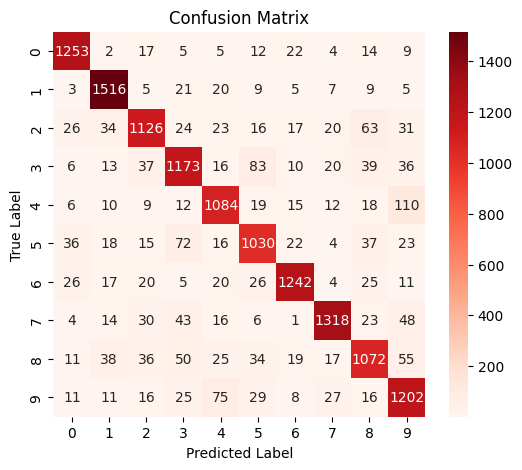

In [10]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
#Print classification report
CR = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(CR)

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1343
           1       0.91      0.95      0.93      1600
           2       0.86      0.82      0.84      1380
           3       0.82      0.82      0.82      1433
           4       0.83      0.84      0.84      1295
           5       0.81      0.81      0.81      1273
           6       0.91      0.89      0.90      1396
           7       0.92      0.88      0.90      1503
           8       0.81      0.79      0.80      1357
           9       0.79      0.85      0.81      1420

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



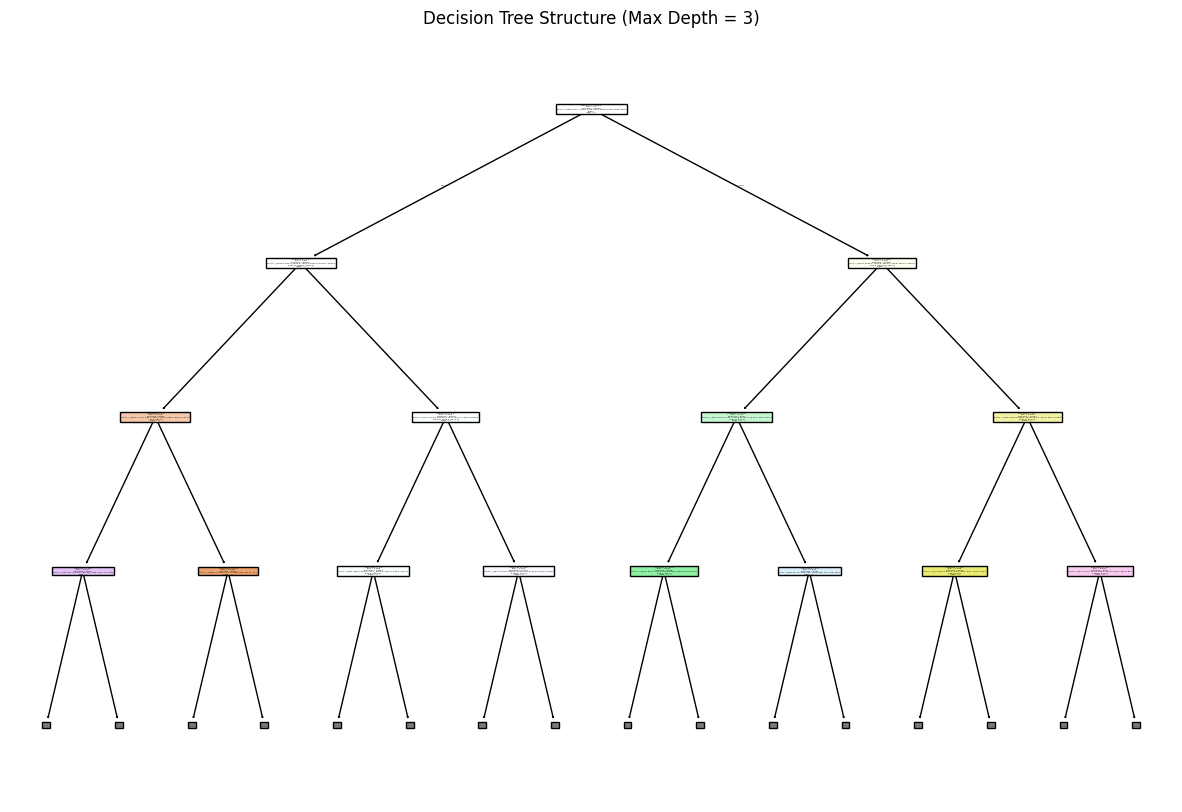

In [12]:
#Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dtc, filled=True, feature_names=mnist.feature_names, class_names=dtc.classes_, max_depth=3)
plt.title('Decision Tree Structure (Max Depth = 3)')
plt.show()

In [13]:
#Visualize some correct and incorrect predictions
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

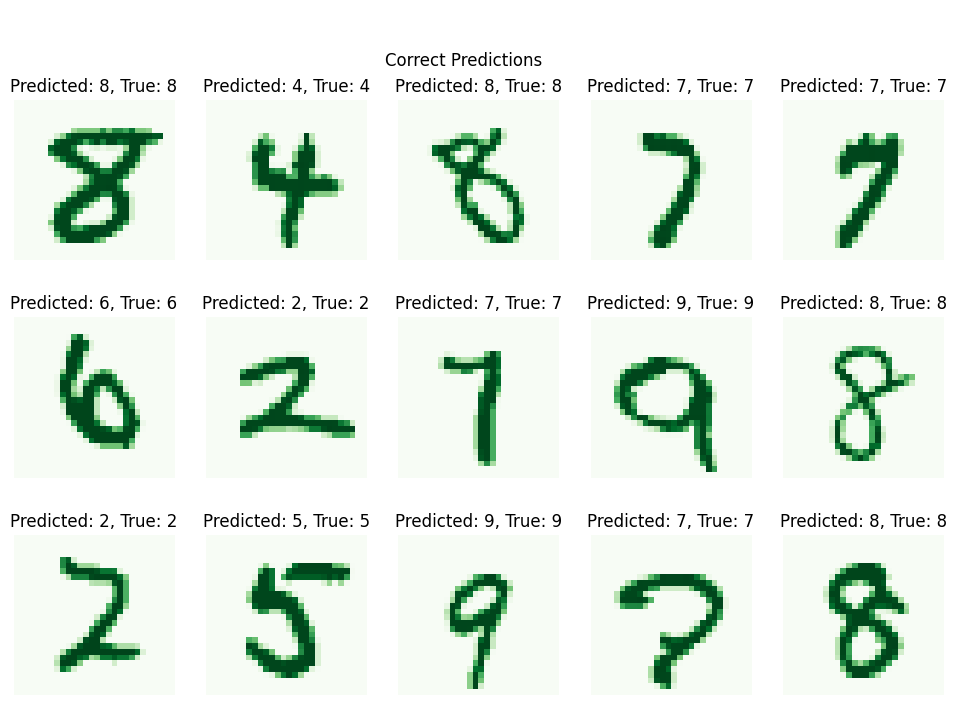

In [14]:
# Plot correct predictions
plt.figure(figsize=(12, 8))
plt.suptitle("\n\nCorrect Predictions\n")
for i, correct in enumerate(correct_indices[:15]):
    plt.subplot(3, 5, i+1)
    # Access data using .iloc for positional indexing
    plt.imshow(X_test.iloc[correct].values.reshape(28, 28), cmap='Greens')
    plt.title(f"Predicted: {y_pred[correct]}, True: {y_test.iloc[correct]}") # Use .iloc for y_test as well
    plt.axis('off')
plt.show()

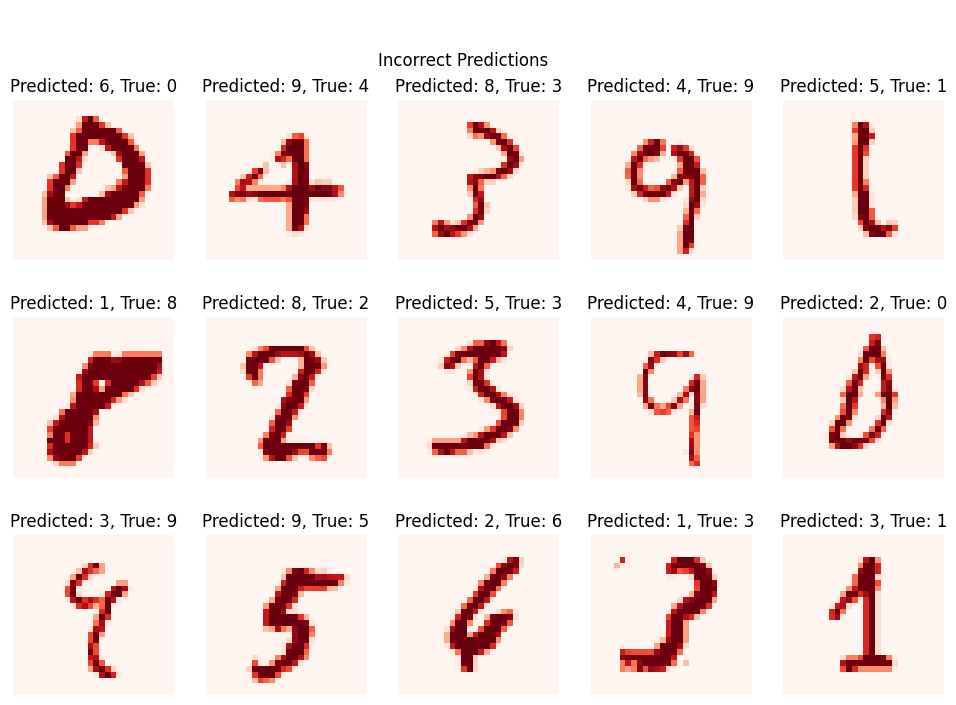

In [15]:
# Plot incorrect predictions
plt.figure(figsize=(12, 8))
plt.suptitle("\n\nIncorrect Predictions")
for i, incorrect in enumerate(incorrect_indices[:15]):
    plt.subplot(3, 5, i+1)
    # Access data using .iloc for positional indexing
    #print(y_test.iloc[incorrect])
    plt.imshow(X_test.iloc[incorrect].values.reshape(28, 28), cmap='Reds')
    plt.title(f"Predicted: {y_pred[incorrect]}, True: {y_test.iloc[incorrect]}") # Use .iloc for y_test as well
    plt.axis('off')
plt.show()